In [2]:
!pip install rarfile


import rarfile

#rar_path = rarfile.RarFile("/content/base_de_donnees.rar")

with rarfile.RarFile('basededonnees.rar') as file:
  for i in range (100*25) :
      file.extract(file.namelist()[i])



on va tracer les 5 premières signatures de l'individu n°0
signature n° 0
fichier : /content/Base de données/0v0.txt
      x     y    P   Az  Al
0  1744  8024   54  115  58
1  1911  8217  146  116  58
2  1896  8241  314  116  58
3  1896  8249  422  116  58
4  1896  8249  504  117  59


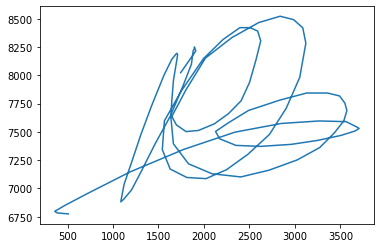

signature n° 1
fichier : /content/Base de données/0v1.txt
      x     y    P   Az  Al
0  1617  6325  170  115  58
1  1770  6485  257  115  58
2  1785  6523  344  116  58
3  1759  6534  444  116  58
4  1749  6526  488  117  59


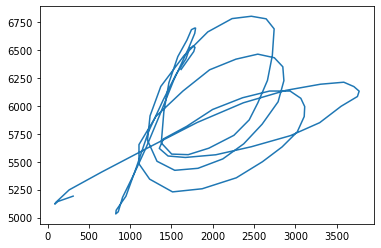

signature n° 2
fichier : /content/Base de données/0v2.txt
      x     y    P   Az  Al
0  1948  4741  143  116  53
1  1991  4790  247  117  54
2  1991  4796  363  119  54
3  1984  4796  453  120  55
4  1984  4791  505  120  55


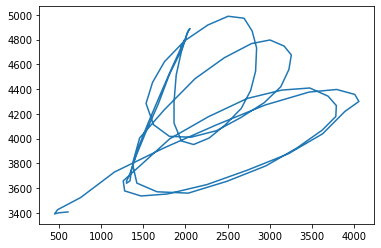

signature n° 3
fichier : /content/Base de données/0v3.txt
      x     y    P   Az  Al
0  1962  3054   71  117  54
1  2139  3187  239  117  54
2  2145  3227  304  117  54
3  2078  3221  410  117  54
4  2060  3179  464  117  54


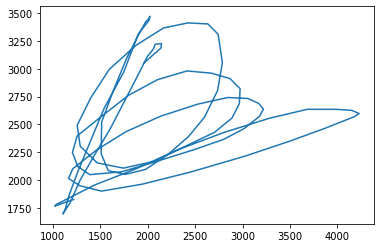

signature n° 4
fichier : /content/Base de données/0v4.txt
      x     y    P   Az  Al
0  1562  1155  119  133  65
1  1703  1280  132  133  65
2  1727  1292  244  133  65
3  1748  1303  334  132  64
4  1754  1308  418  132  64


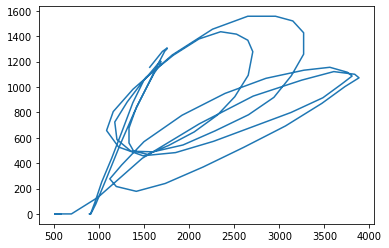

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



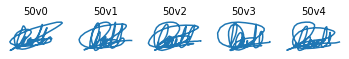

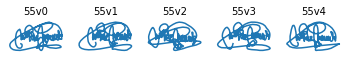

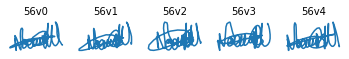

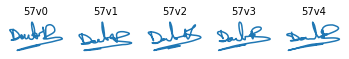

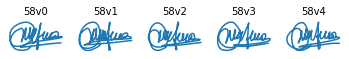

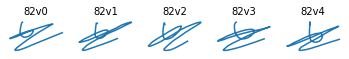

In [ ]:
indivs=[50,55,56,57,58,82]

for indiv in range(6):
  for signature in range (5) :
    plt.subplot(6,5, 5*indiv+signature+1)
    plt.title(str(indivs[indiv]) + "v" + str(signature), fontsize = 10)
    fichier="/content/Base de données/" + str(indivs[indiv]) + "v"+ str(signature) + ".txt"
    signature=pd.read_csv(fichier, header=None, sep=' ', names=["x", "y", "P", "Az", "Al"])
    plt.plot(signature.x, signature.y)
    plt.axis('off')
  plt.show()


In [ ]:
#X=[[]for indiv in range (100)]
#for indiv in range (100) :
#  for signature in range (25) :
#    fichier="/content/Base de données/"+str(indiv) +"v"+ str(signature) + ".txt"
#    X[indiv].append(pd.read_csv(fichier, header=None, sep=' ', names=["x", "y", "P", "Az", "Al"]))

#X[i][s] est la signature n°s de l'indiv n°i.


#y=[i for i in range (100)]



In [ ]:

complexite4G=pd.read_csv('Complexité avec 4G (100x25).txt', sep='\t', header=None)
complexite4G.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,33.196174,30.630899,31.620366,30.729677,31.315783,31.648257,30.743751,31.634842,31.707932,29.596445,30.323407,31.795219,32.319620,32.177221,31.080531,30.034296,31.256953,29.305608,30.010867,31.094744,30.774858,29.950962,31.421825,31.139166,30.652187
1,29.986983,30.583706,27.625032,29.292256,29.669269,30.538943,29.909474,29.824111,29.922407,29.220199,30.427099,30.336256,29.302684,30.103992,30.250328,28.576933,29.393262,28.996437,27.985681,29.939702,27.541448,29.462055,29.248769,28.552702,29.870580
2,30.667706,30.917278,30.731127,30.748777,30.855065,32.236980,31.065298,31.153569,30.932364,30.829701,30.650219,30.704956,30.571014,30.145674,31.299699,30.687147,31.802889,30.838860,30.649592,31.223375,31.348533,31.315678,30.656321,30.705063,30.649945
3,31.983777,31.454306,31.904044,31.719449,31.710378,32.448793,30.467831,32.585240,32.659873,31.963733,30.968441,32.064587,30.824743,32.691652,32.106744,31.797451,32.108550,30.755998,30.897831,32.106789,32.536209,32.524911,33.453109,32.442567,32.412028
4,28.689045,30.712718,30.181779,29.941101,29.958030,30.592751,31.319760,31.154500,30.637440,30.188860,30.364722,29.248481,30.065474,30.163152,31.846820,30.073755,30.627108,30.416238,29.702336,29.707336,29.796852,30.210354,30.064297,30.341761,30.249106


In [ ]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=0)
pca.fit(complexite4G)
complexite4G_array = pca.transform(complexite4G)
complexite4G_pca = pd.DataFrame(complexite4G_array, columns=['PC1','PC2']) # PC=principal component
complexite4G_pca.sample(5)

,PC1,PC2
10,-9.898817,0.686049
59,4.055093,-0.033467
6,-2.557712,0.217230
54,7.762507,-0.811773
5,-2.979337,-0.320807


[0 1 0 0 1 0 1 2 1 0 0 0 0 0 2 2 2 2 2 1 2 2 2 1 0 0 1 0 2 1 1 1 0 0 1 1 2
 0 0 0 1 0 1 1 0 0 1 1 1 2 1 1 0 0 2 0 0 1 1 1 0 1 2 0 0 1 1 1 2 1 0 1 2 1
 0 0 0 0 1 1 1 0 2 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 2]
cluster n°0
-4.756213914811376
-2.66755787787672
cluster n°1
3.1584221401209636
-1.4421729191547228
cluster n°0
-4.196292405141625
-0.08085154120338207
cluster n°0
-9.315086244737532
0.22720285783385524
cluster n°1
-0.7187930030251262
-0.11863126576917966
cluster n°0
-2.9793366807802313
-0.32080745182641623
cluster n°1
-2.557712336513738
0.21722959460768007
cluster n°2
6.984742622821055
-0.6812135124221017
cluster n°1
2.4963531856942294
0.34116756638615225
cluster n°0
-3.632032945581034
-0.8081373240840537
cluster n°0
-9.898816943399265
0.6860491367969671
cluster n°0
-9.499678393197149
0.5428382655669901
cluster n°0
-5.070675283963789
0.6826544043010127
cluster n°0
-3.1067815342776535
-0.3578262130803894
cluster n°2
7.907336269716304
0.8880519219166978
cluster n°2
13.647950809479784
2.

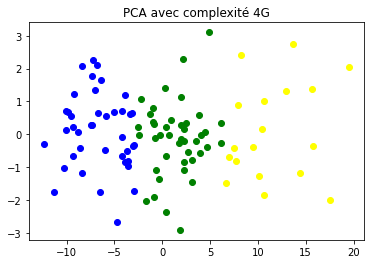

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib

gmm = GaussianMixture(n_components=3)
gmm.fit(complexite4G)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(complexite4G)

#df_plot['ClusterGMM'] = y_cluster_gmm
#plt.scatter(complexite4G, y_cluster_gmm)

# color map
cmap = matplotlib.cm.get_cmap('prism')

complexite4G_mean =np.mean(complexite4G, axis=1)

for i in range (100) :
  cluster=y_cluster_gmm[i]
  if cluster==0 : 
    color='blue'
  elif cluster==1 :
    color='green'
  else :
    color='yellow'
  #print("cluster n°" + str(cluster))
  #print(complexite4G_pca['PC1'][i])
  #print(complexite4G_pca['PC2'][i])
  plt.scatter(complexite4G_pca['PC1'][i], complexite4G_pca['PC2'][i], color = color)
plt.title("PCA avec complexité 4G")
plt.show() 


           0          1          2   ...         22         23         24
0   19.418379  21.168041  17.978114  ...  17.915963  19.754014  17.689681
1   23.891532  21.410094  22.217169  ...  20.844714  23.126296  21.378493
2   26.781532  27.125942  26.783903  ...  26.475316  26.158157  25.317402
3   25.570153  23.337583  26.074787  ...  25.472147  26.057215  25.046337
4   19.803114  22.290674  22.967518  ...  23.373926  24.337768  23.433979
..        ...        ...        ...  ...        ...        ...        ...
95  27.410627  27.055017  26.765978  ...  27.830131  25.735071  25.918047
96  27.628290  28.315554  28.403552  ...  28.240520  28.716032  28.150564
97  27.548235  28.021903  28.980642  ...  27.914601  28.367971  27.604251
98  25.663429  26.681710  25.714770  ...  27.009922  26.475277  26.140565
99  24.753892  22.326640  23.543420  ...  22.460269  20.610111  20.705842

[100 rows x 25 columns]
weights
[0.34435324 0.07768669 0.57796007]
100
25
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 

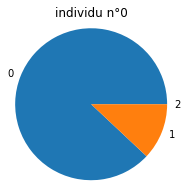

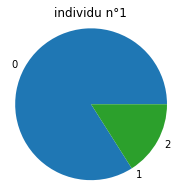

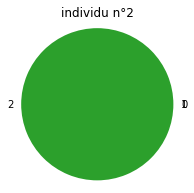

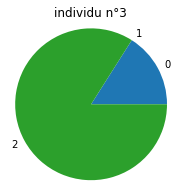

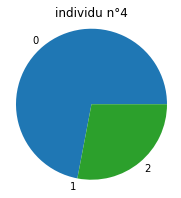

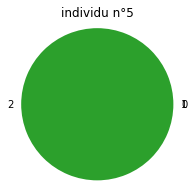

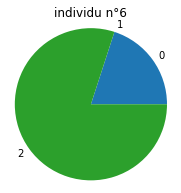

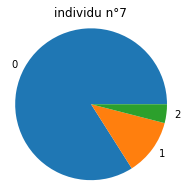

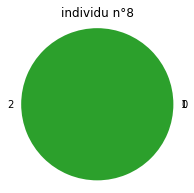

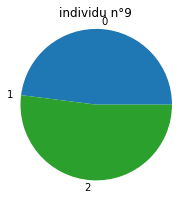

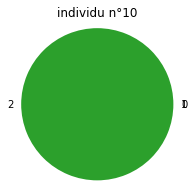

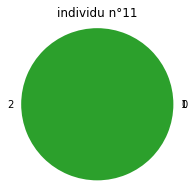

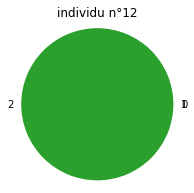

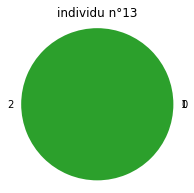

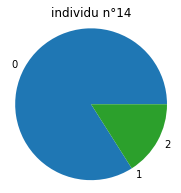

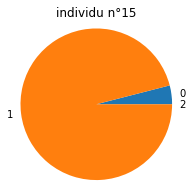

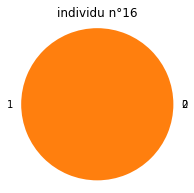

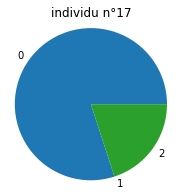

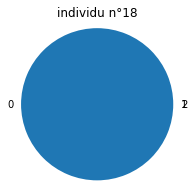

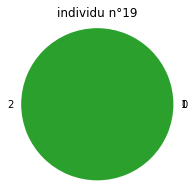

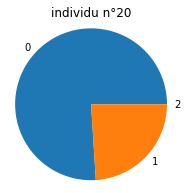

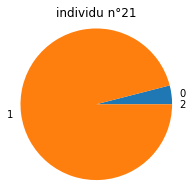

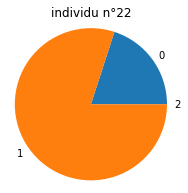

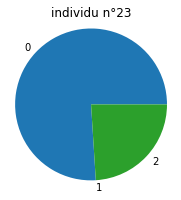

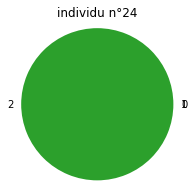

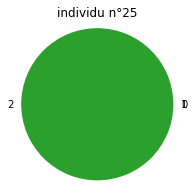

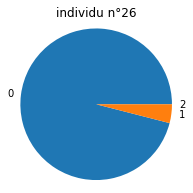

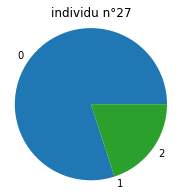

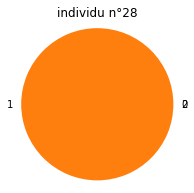

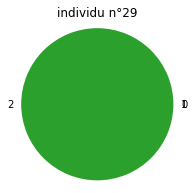

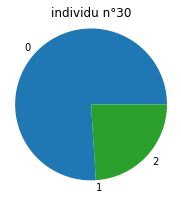

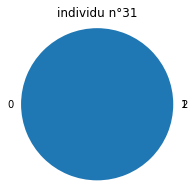

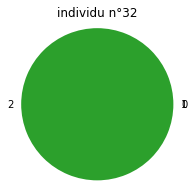

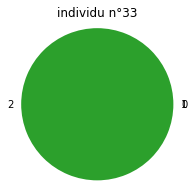

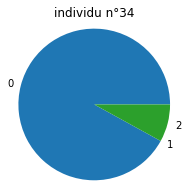

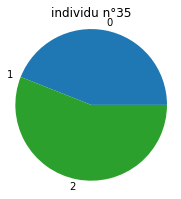

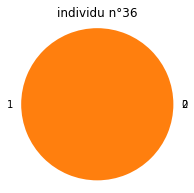

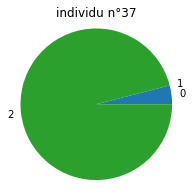

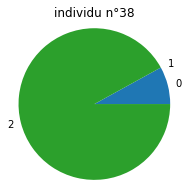

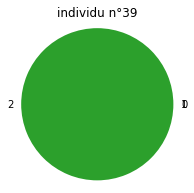

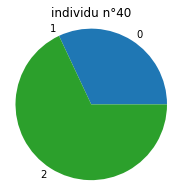

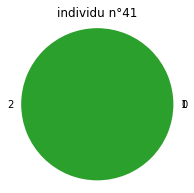

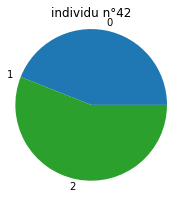

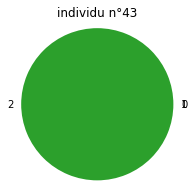

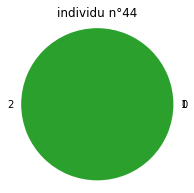

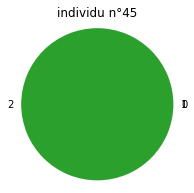

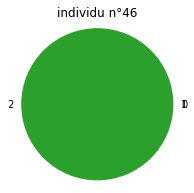

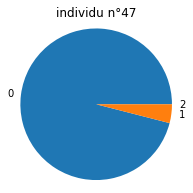

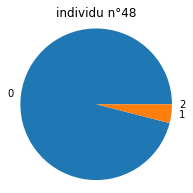

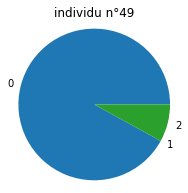

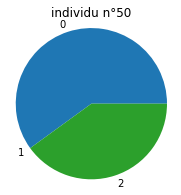

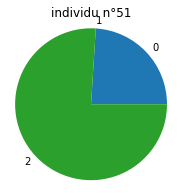

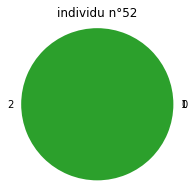

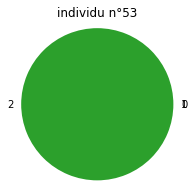

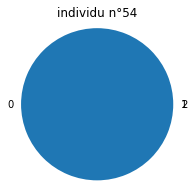

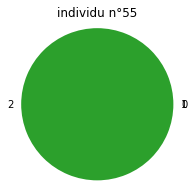

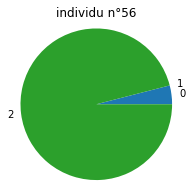

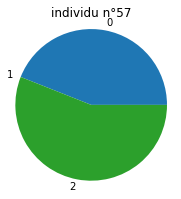

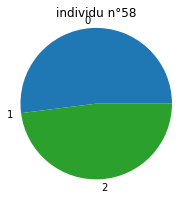

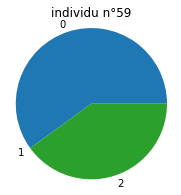

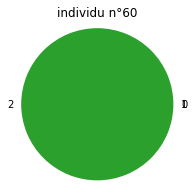

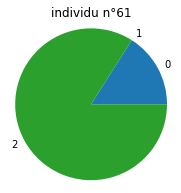

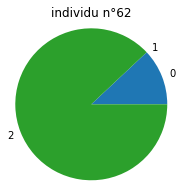

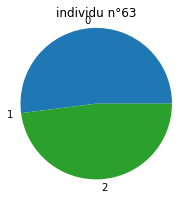

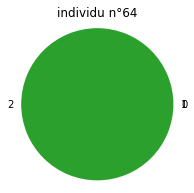

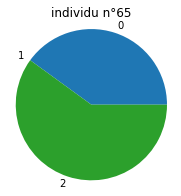

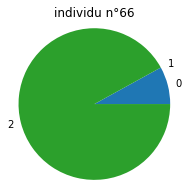

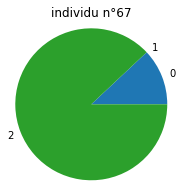

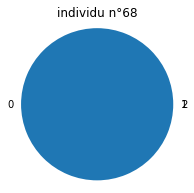

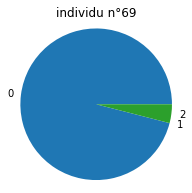

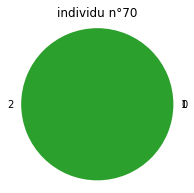

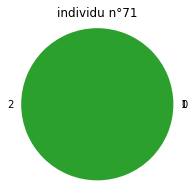

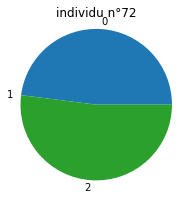

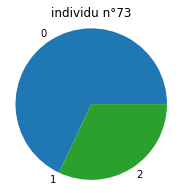

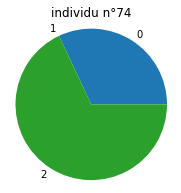

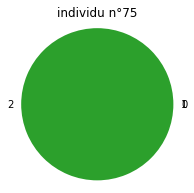

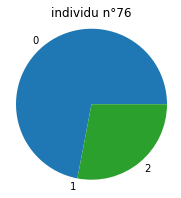

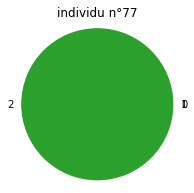

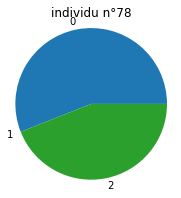

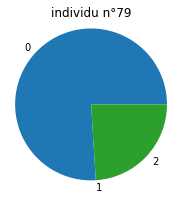

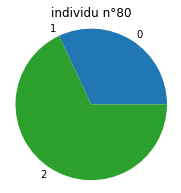

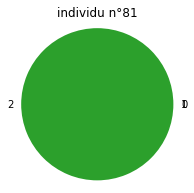

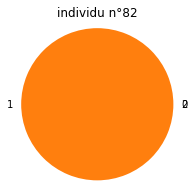

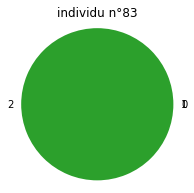

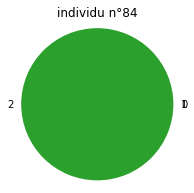

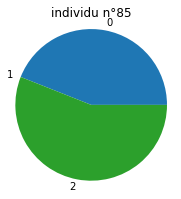

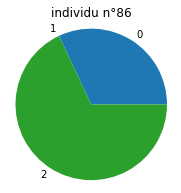

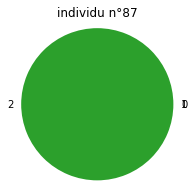

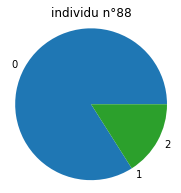

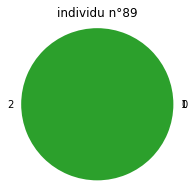

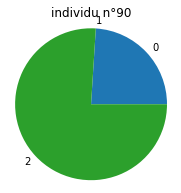

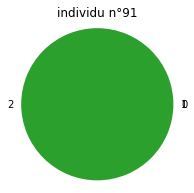

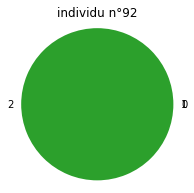

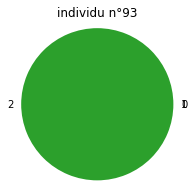

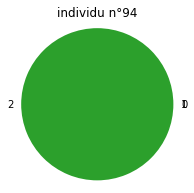

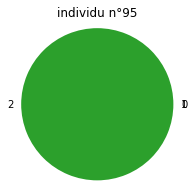

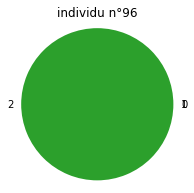

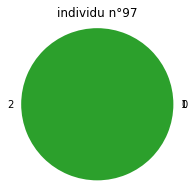

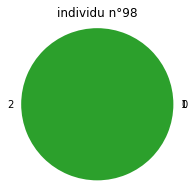

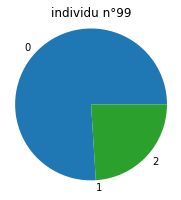

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans


data=pd.read_csv('Complexité avec 24G (100x25).txt', sep='\t', header=None)

def to_flat(tab) :
  result=[]
  for list in tab :
    for ele in list :
      result.append([ele])
  return result

print(data)
array_data=np.array(data)
flat_data=to_flat(array_data)
gmm = GaussianMixture(n_components=3).fit(flat_data)
clusters = gmm.predict(flat_data)
weights=gmm.weights_


clusters_par_personne=[]
for i in range (100) :
  clusters_par_personne.append(clusters[i*25:(i+1)*25])


def count(labels, liste) :
  compte=[0,0,0]
  for e in liste :
    compte[e]+=1
  return compte

labels=[0,1,2]
for indiv in range(100) :
  sizes=count(labels, clusters_par_personne[indiv])
  fig, ax=plt.subplots(1,1,figsize=(3,3))
  plt.title("individu n°" + str(indiv))
  ax.pie(sizes,labels=labels)
  ax.axis('equal')
  plt.show()


[2 2 2 ... 2 1 2]
[1 2 1 2 1 2 1 1 1 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 1 2 2 

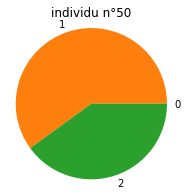

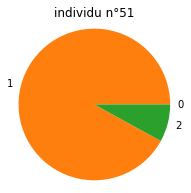

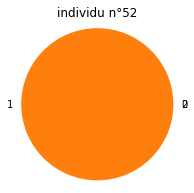

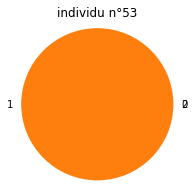

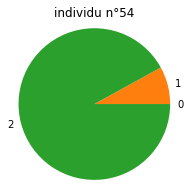

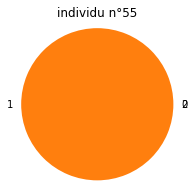

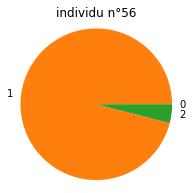

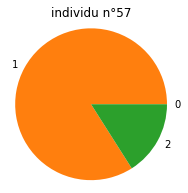

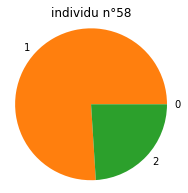

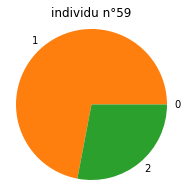

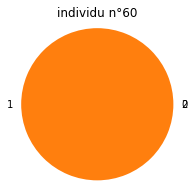

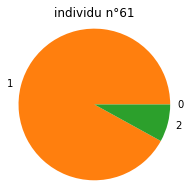

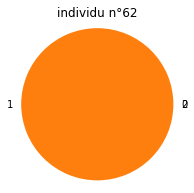

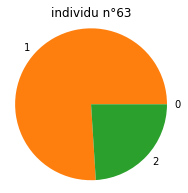

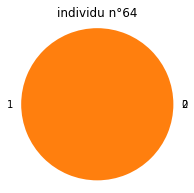

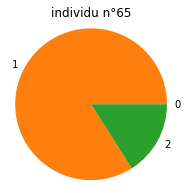

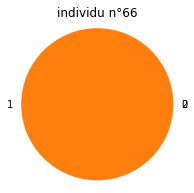

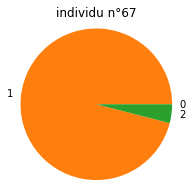

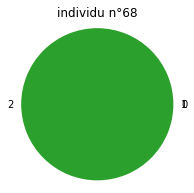

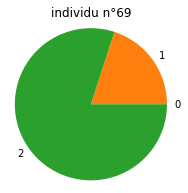

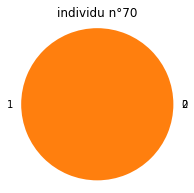

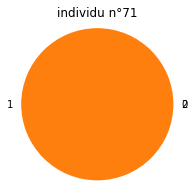

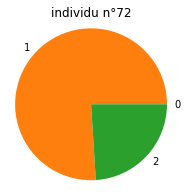

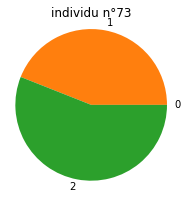

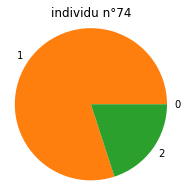

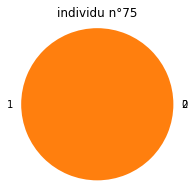

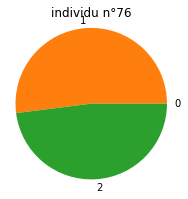

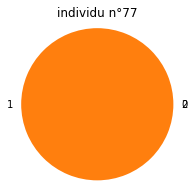

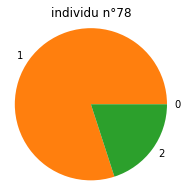

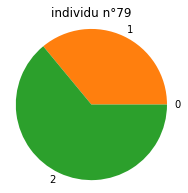

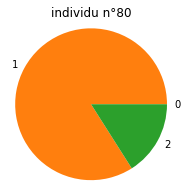

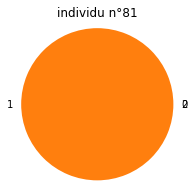

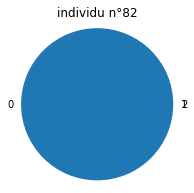

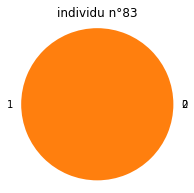

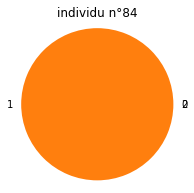

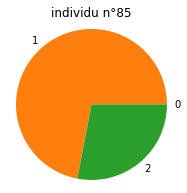

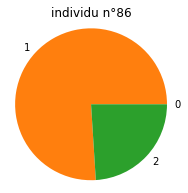

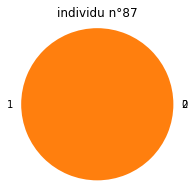

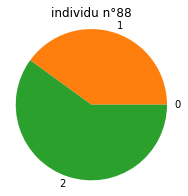

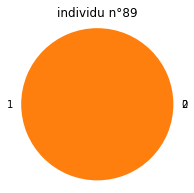

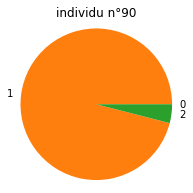

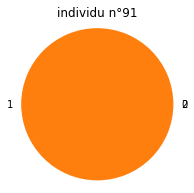

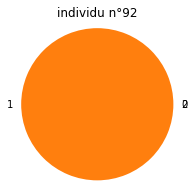

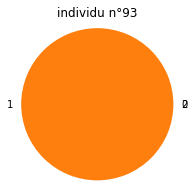

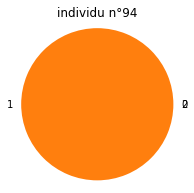

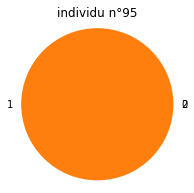

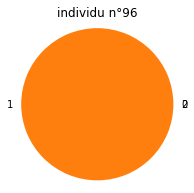

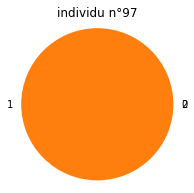

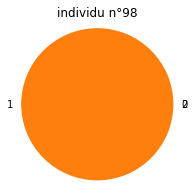

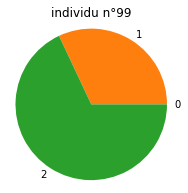

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import tree


data1=flat_data[0:1250]
data2=flat_data[1250:25000] #pas 2500 ??

# kmeans sur data1

kmeans=MiniBatchKMeans(n_clusters=3)
kmeans.fit(data1)
labels=kmeans.labels_
print(labels)
#DecisionTreeClassifier sur data2

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data1, labels)
predictions=clf.predict(data2)
print(predictions[0:1000])


clusters_par_personne_decisiontree=[]
for i in range (50) :
  clusters_par_personne_decisiontree.append(predictions[i*25:(i+1)*25])
print(len(clusters_par_personne_decisiontree))
print(len(clusters_par_personne_decisiontree[0]))
print(clusters_par_personne_decisiontree[0])

def count(labels, liste) :
  compte=[0,0,0]
  for e in liste :
    compte[e]+=1
  return compte

labels=[0,1,2]
for indiv in range(50) :
  sizes_decisiontree=count(labels, clusters_par_personne_decisiontree[indiv])
  fig, ax=plt.subplots(1,1,figsize=(3,3))
  plt.title("individu n°" + str(50+indiv))
  ax.pie(sizes_decisiontree,labels=labels)
  ax.axis('equal')
  plt.show()